<a href="https://colab.research.google.com/github/shemi024/data-preprocessing/blob/main/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#loading data from other folder
data=pd.read_csv('/content/drive/MyDrive/winequalityN (1).csv')


In [ ]:
data.head

<bound method NDFrame.head of        type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...       0.45      8.8        6
1     white            6.3             0.300  ...       0.49      9.5        6
2     white            8.1             0.280  ...       0.44     10.1        6
3     white            7.2             0.230  ...       0.40      9.9        6
4     white            7.2             0.230  ...       0.40      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...       0.58     10.5        5
6493    red            5.9             0.550  ...        NaN     11.2        6
6494    red            6.3             0.510  ...       0.75     11.0        6
6495    red            5.9             0.645  ...       0.71     10.2        5
6496    red            6.0             0.310  ...       0.66     11.0        6

[6497 rows x 13 colum

In [ ]:
data.shape

(6497, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
 for i in ['fixed acidity','volatile acidity','citric acid',
           'residual sugar','pH','sulphates','chlorides']:
          data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

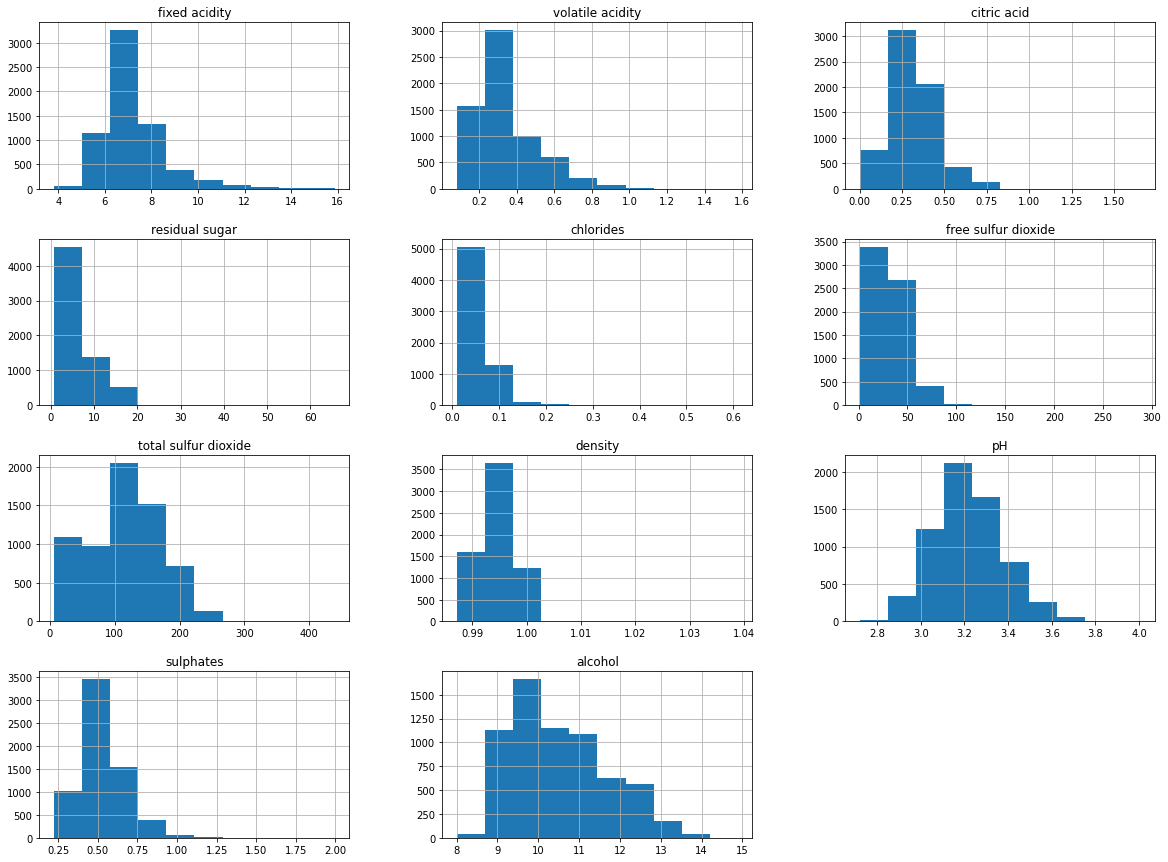

In [ ]:
dgraph = data.select_dtypes(include = ['float'])
dgraph.hist(figsize=(20,15))
plt.show()

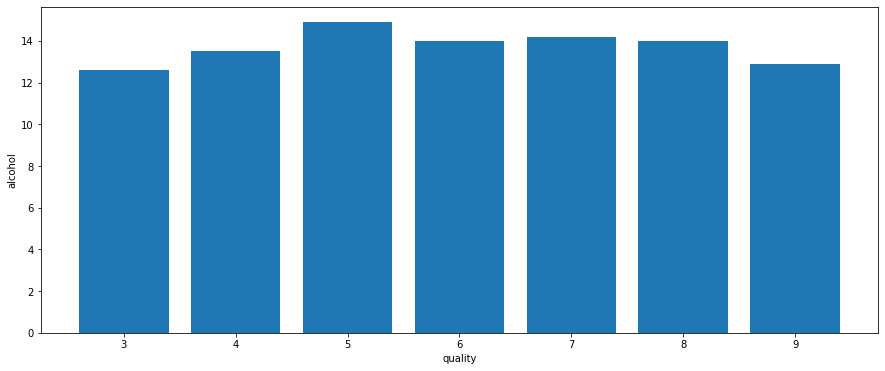

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

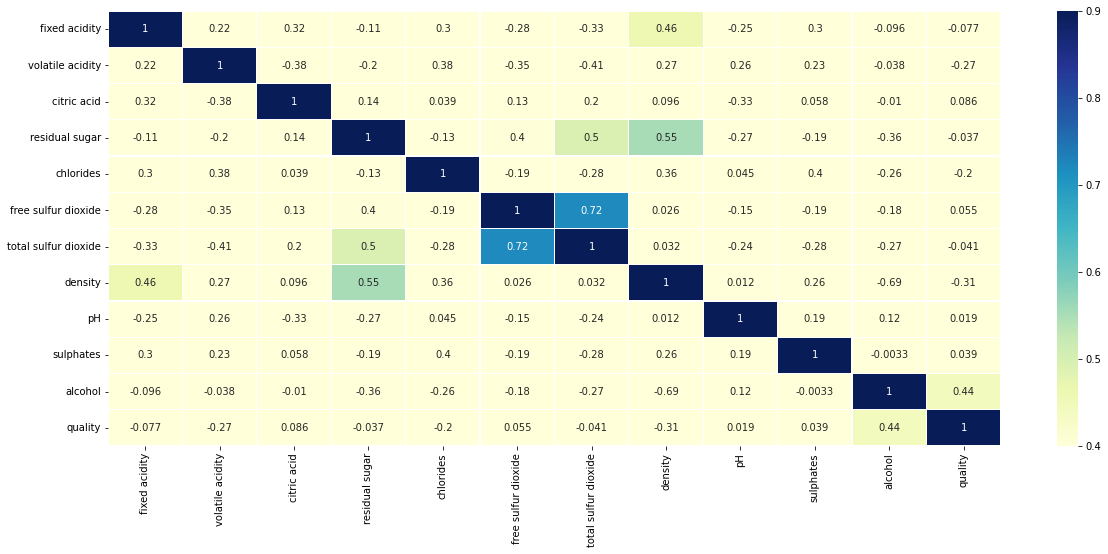

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
data =data.drop('total sulfur dioxide',axis = 1)

In [ ]:
data=pd.get_dummies(data)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
#split the dataset and create the model
data.columns
y=data['quality']
x=data.drop('quality', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scale
norm_fit = norm.fit(x_train)
# transformation of training data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[0.23140496 0.11333333 0.21686747 ... 0.10857143 0.17391304 1.        ]
 [0.38842975 0.05333333 0.21084337 ... 0.07428571 0.28985507 1.        ]
 [0.18181818 0.13333333 0.20481928 ... 0.08571429 0.31884058 1.        ]
 ...
 [0.79338843 0.12666667 0.37349398 ... 0.25142857 0.24637681 0.        ]
 [0.4214876  0.21333333 0.30722892 ... 0.38285714 0.7826087  0.        ]
 [0.3553719  0.12666667 0.21084337 ... 0.22857143 0.34782609 1.        ]]


In [ ]:
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))
#r2 ede value
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))


MSE IS: 0.4705313210515726
R squared value is : 0.34172955993185683


In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
# for error checking
#from sklearn.matrics import mean_squared_error
 
#from sklearn.metrics import classification_report
 
# create model variable
rnd = RandomForestClassifier()
 
# fit the model
fit_rnd = rnd.fit(scal_xtrain,y_train)
 
# checking the accuracy score
rnd_score = rnd.score(scal_xtest,y_test)
 
print('score of model is : ',rnd_score)

score of model is :  0.6923076923076923


In [ ]:
x_predict = list(rnd.predict(x_test))
df = {'predicted':x_predict,'original':y_test}
pd.DataFrame(df).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,predicted,original
3103,6,7
1419,6,7
4761,6,6
4690,6,6
4032,6,5
1297,6,7
1773,6,6
5584,6,5
561,6,5
5946,6,6
